In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


# Лабораторная работа 5.2.1
# Опыт Франка-Герца
	

### Цель работы
Методом электронного возбуждения измерить энергию первого уровня атома гелия в динамическом и статическом режимах

### В работе используются:
трёхэлектродная лампа ЛМ-2, батарея 4,5 В, микроамперметр, понижающий трансформатор,
осциллограф, блок источников питания, вольтметр В7-22А


### Теоретические положения
Опыт Франка-Герца подтверждает существование дискретных уровней энергии атомов. Разреженный одноатомный газ заполняет трёхэлектродную лампу. Электроны, испускаемые разогретым катодом, ускоряются в постоянном электрическом поле, созданном между катодом и сетчатым анодом лампы. Передвигаясь от катода к аноду, электроны сталкиваются с атомами гелия.<br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1) Энергия электрона недостаточна, чтобы возбудить/ионизировать атом -> $упругое$ $столкновение$, электрон не теряет энергию<br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2) При большой разности потенциалов энергия электрона достаточна для возбуждения атомов -> $неупругое$ $столкновение$, кинетическая энергия передаётся одному из атомных электронов, в результате чего происходит: <br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$возбуждение$ - переход одного из атомных электронов на свободный энергетический уровень<br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ионизация$ - отрыв электрона от атома 


Объясним вид зависимости тока коллектора (измеряется микроамперметром) от напряжения на аноде. При увеличении потенциала анода ток в лампе сначала растёт (зависимость, подобная ВАХ вакуумного диода). Когда энергия электронов становится достаточной для возбуждения атомов, ток коллектора резко уменьшается. Это происходит потому, что при неупругих соударениях с атомами электроны теряют свою энергию и не могут преодолеть задерживающее напряжение (около 1 В) между анодом и коллектором. При дальнейшем увеличении потенциала ток коллектора вновь возрастает: электроны, испытавшие неупругие соударения, при дальнейшем движении к аноду успевают набрать энергию, достаточную для преодоления задерживающего потенциала. Следующее замедление роста тока происходит в момент, когда часть электронов неупруго сталкивается с атомами два раза. Таким образом, на кривой зависимости тока коллектора от напряжения анода имеется ряд максимумов и минимумов, отстоящих друг от друга на равные расстояния, равные энергии первого возбуждённого состояния.

# $ I = f(V_a), dynamic$

In [184]:
#(del = 5mV)
# задерживающее напряжение = 4V
dV4_max = 20 #V
dV4_min = 17 #V
# задерживающее напряжение = 6V
dV6_max = 17 #V
dV6_min = 19 #V
# задерживающее напряжение = 8V
dV8_max = 21 #V
dV8_min = 20 #V

maxV = [dV4_max, dV6_max, dV8_max]
minV = [dV4_min, dV6_min, dV8_min]
max_mean = round(np.mean(maxV), 2) 
min_mean = round(np.mean(minV), 2) 

data = {
  "dV_max": maxV + [max_mean],
  "dV_min": minV + [min_mean]
}

max_min = pd.DataFrame(data, index = ["4v", "6v", "8v", "mean"])
qmax_mean = math.sqrt(sum(abs(np.array(maxV) - max_mean))/6)
qmin_mean = math.sqrt(sum(abs(np.array(minV) - min_mean))/6)

v_exp = (max_mean + min_mean)/2

display(max_min)

,dV_max,dV_min
4v,20.00,17.00
6v,17.00,19.00
8v,21.00,20.00
mean,19.33,18.67



Значение энергии первого возбуждённого состояния атома гелия: <br></br>
$V_{max}$ = $19.33 \pm 0.88V$ <br></br>
$V_{min}$ = $18.667 \pm 0.74V$

$\sigma_{V_{mean}} = \sqrt{\frac{1}{6}\sum (V_i - \overline{V})}$ -  погрешность среднего значения 

$\sigma_{V_{прибора}}$ = $\sigma_{V_4^2}$ + $\sigma_{V_6^2}$ + $\sigma_{V_8^2}$  = $1.8V$ - погрешность прибора 

Тогда среднее значение первого возбуждённого состояния атома гелия по результатам эксперимента

$V_{exp}$ = $19.0 \pm 1.7 $ Эв <br></br>
при табличном значении $V_t$ = $21.6$ Эв
<br></br>
<br></br>



# $ I,мкА = f(V_a,В), static$
### $Задерживающее$ $напряжение$ $ V = 4 B $

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
$V$,14.710,17.0600,17.6000,18.0800,18.6900,19.400,21.2500,23.5000,25.0700,28.500,31.1500,33.600,37.4000,39.800,41.4300,44.9000,45.300,47.800
$I$,0.087,0.0959,0.1002,0.1098,0.1198,0.123,0.1204,0.1195,0.1182,0.115,0.1161,0.158,0.1788,0.187,0.1898,0.1868,0.185,0.182


,dV_max,dV_min
$4v$,22.03,19.3


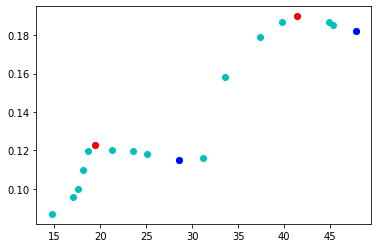

In [185]:
V4 = np.array([14.71, 17.06, 17.60, 18.08, 18.69, 19.40, 21.25, 23.50, 25.07, 28.5, 31.15, 33.6, 37.4, 39.8, 41.43, 44.9, 45.3, 47.8])
I4 = np.array([0.087, 0.0959, 0.1002, 0.1098, 0.1198, 0.1230, 0.1204, 0.1195, 0.1182, 0.1150, 0.1161, 0.1580, 0.1788, 0.1870, 0.1898, 0.1868, 0.1850, 0.1820])
V_I= pd.DataFrame({"$V$": V4, "$I$": I4})

maxV, maxI = [41.43, 19.4], [0.1898, 0.123]
minV, minI = [47.8, 28.5], [0.182, 0.115]
plt.plot(V4, I4, "o", color = "c")
plt.plot(maxV, maxI, "o", color = "r")
plt.plot(minV, minI, "o", color = "b")

dV4_max = max(maxV) - min(maxV)
dV4_min = max(minV) - min(minV)

data = {"dV_max": [dV4_max], "dV_min": [dV4_min]}
max_min = pd.DataFrame(data, index = ["$4v$"])
display(V_I.T)
display(max_min)

<br></br>

## $Задерживающее$ $напряжение$ $ V = 6 B $

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
$V$,16.900,18.9000,20.4800,20.9000,21.8000,22.860,23.0000,23.6000,25.0000,26.3000,...,40.4000,41.9000,43.0000,45.3000,47.7000,49.5000,52.3000,55.200,59.0000,64.30
$I$,0.096,0.1032,0.0985,0.0972,0.0925,0.061,0.0543,0.0427,0.0343,0.0393,...,0.1385,0.1293,0.1234,0.1221,0.1149,0.1159,0.1259,0.147,0.1667,0.17


,dV_max,dV_min
$6v$,19.15,22.7


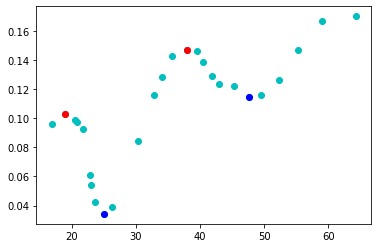

In [186]:
V6 = np.array([16.9, 18.9, 20.48, 20.9, 21.8, 22.86, 23.0, 23.6, 25.0, 26.3, 30.3, 32.9, 34.09, 35.7, 38.05, 39.57, 40.40, 41.90, 43.0, 45.30, 47.70, 49.5, 52.3, 55.2, 59.0, 64.3])
I6 = ([0.0960, 0.1032, 0.0985, 0.0972, 0.0925, 0.0610, 0.0543, 0.0427, 0.0343, 0.0393, 0.0843, 0.1157, 0.1286, 0.1429, 0.1471, 0.1460, 0.1385, 0.1293, 0.1234, 0.1221, 0.1149, 0.1159, 0.1259, 0.1470, 0.1667, 0.1700])
V_I= pd.DataFrame({"$V$": V6, "$I$": I6})

maxV, maxI = [38.05, 18.9], [0.1471, 0.1032]
minV, minI = [47.7, 25.0], [0.1149, 0.0343]
plt.plot(V6, I6, "o", color = "c")
plt.plot(maxV, maxI, "o", color = "r")
plt.plot(minV, minI, "o", color = "b")

dV6_max = max(maxV) - min(maxV)
dV6_min = max(minV) - min(minV)

data = {"dV_max": [dV6_max], "dV_min": [dV6_min]}
max_min = pd.DataFrame(data, index = ["$6v$"])
display(V_I.T)
display(max_min)

In [187]:
max_min

,dV_max,dV_min
$6v$,19.15,22.7


<br></br>

## $Задерживающее$ $напряжение$ $ V = 8 B $

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
$V$,5.9000,9.900,13.0000,17.0000,19.900,23.4000,24.7000,26.100,28.200,30.4600,...,38.050,40.1000,42.3000,44.3000,45.3000,46.6000,48.0000,50.6000,53.6000,58.0000
$I$,0.0087,0.034,0.0576,0.0829,0.086,0.0467,0.0182,0.014,0.026,0.0505,...,0.118,0.1111,0.0953,0.0889,0.0837,0.0761,0.0757,0.0774,0.0888,0.1097


,dV_max,dV_min
$8v$,18.15,21.9


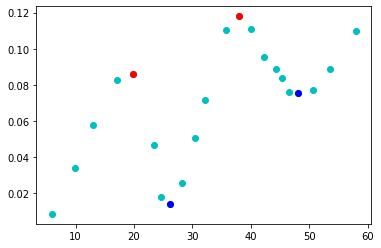

In [188]:
V8 = np.array([5.90, 9.90, 13.0, 17.0, 19.9, 23.4, 24.7, 26.10, 28.20, 30.46, 32.17, 35.78, 38.05, 40.10, 42.30, 44.30, 45.30, 46.6, 48.0, 50.6, 53.6, 58.0])
I8 = np.array([0.0087, 0.0340, 0.0576, 0.0829, 0.0860, 0.0467, 0.0182, 0.0140, 0.0260, 0.0505, 0.0715, 0.1103, 0.1180, 0.1111, 0.0953, 0.0889, 0.0837, 0.0761, 0.0757, 0.0774, 0.0888, 0.1097])
V_I= pd.DataFrame({"$V$": V, "$I$": I})

maxV, maxI = [38.05, 19.9], [0.1180, 0.086]
minV, minI = [26.1, 48], [0.014, 0.0757]
plt.plot(V8, I8, "o", color = "c")
plt.plot(maxV, maxI, "o", color = "r")
plt.plot(minV, minI, "o", color = "b")

dV8_max = max(maxV) - min(maxV)
dV8_min = max(minV) - min(minV)

data = {"dV_max": [dV8_max], "dV_min": [dV8_min]}
max_min = pd.DataFrame(data, index = ["$8v$"])
display(V_I.T)
display(max_min)

In [189]:
data = {"dV_max": [dV8_max, dV6_max, dV4_max], "dV_min": [dV8_min, dV6_min, dV4_min]}
max_min = pd.DataFrame(data, index = ["$8B$", "$6B$", "$4B$"])

maxV = [dV4_max, dV6_max, dV8_max]
minV = [dV4_min, dV6_min, dV8_min]
max_mean = round(np.mean(maxV), 2) 
min_mean = round(np.mean(minV), 2) 

data = {
  "dV_max": maxV + [max_mean],
  "dV_min": minV + [min_mean]
}

max_min = pd.DataFrame(data, index = ["$4v$", "$6v$", "$8v$", "$mean$"])
qmax_mean = math.sqrt(sum(abs(np.array(maxV) - max_mean))/6)
qmin_mean = math.sqrt(sum(abs(np.array(minV) - min_mean))/6)

v_exp = (max_mean + min_mean)/2

display(max_min)

,dV_max,dV_min
$4v$,22.03,19.3
$6v$,19.15,22.7
$8v$,18.15,21.9
$mean$,19.78,21.3


<br></br>
Значение энергии первого возбуждённого состояния атома гелия: <br></br>
$V_{max}$ = $19.78 \pm 0.86v$ <br></br>
$V_{min}$ = $21.3 \pm 0.81v$


Тогда среднее значение первого возбуждённого состояния атома гелия по результатам эксперимента

$V_{exp}$ = $20.54 \pm 1.2 $ Эв <br></br>
при табличном значении $V_t$ = $21.6$ Эв

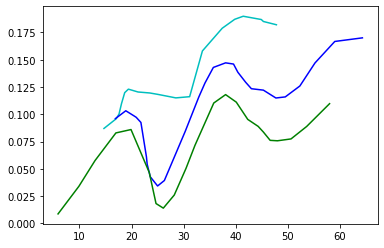

In [190]:
plt.plot(V4, I4, color = "c")
plt.plot(V6, I6, color = "b")
plt.plot(V8, I8, color = "g")